# **CUSTERING PADA COUNTRY DATASET**

Nama : Agnes Damai Arifiana

NIM : 4112322023


## **Importing Libraries**

In [135]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.metrics import silhouette_score
!pip install kneed

## **Loading Data**

In [136]:
Country = pd.read_csv("Country_Dataset.csv")
Country

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## **Data Cleaning**

In [137]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [138]:
Country.describe(include=['object'])

,Country
count,167
unique,167
top,Afghanistan
freq,1


In [139]:
Country.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
child_mort,167.000000,38.270060,40.328931,2.600000,8.250000,19.300000,62.100000,208.000000
exports,167.000000,41.108976,27.412010,0.109000,23.800000,35.000000,51.350000,200.000000
health,167.000000,6.815689,2.746837,1.810000,4.920000,6.320000,8.600000,17.900000
imports,167.000000,46.890215,24.209589,0.065900,30.200000,43.300000,58.750000,174.000000
income,167.000000,17144.688623,19278.067698,609.000000,3355.000000,9960.000000,22800.000000,125000.000000
inflation,167.000000,7.781832,10.570704,-4.210000,1.810000,5.390000,10.750000,104.000000
life_expec,167.000000,70.555689,8.893172,32.100000,65.300000,73.100000,76.800000,82.800000
total_fer,167.000000,2.947964,1.513848,1.150000,1.795000,2.410000,3.880000,7.490000
gdpp,167.000000,12964.155689,18328.704809,231.000000,1330.000000,4660.000000,14050.000000,105000.000000


In [140]:
print(f"Number of dupilcated data: {Country.duplicated().sum()}")

Number of dupilcated data: 0


Noise Detection

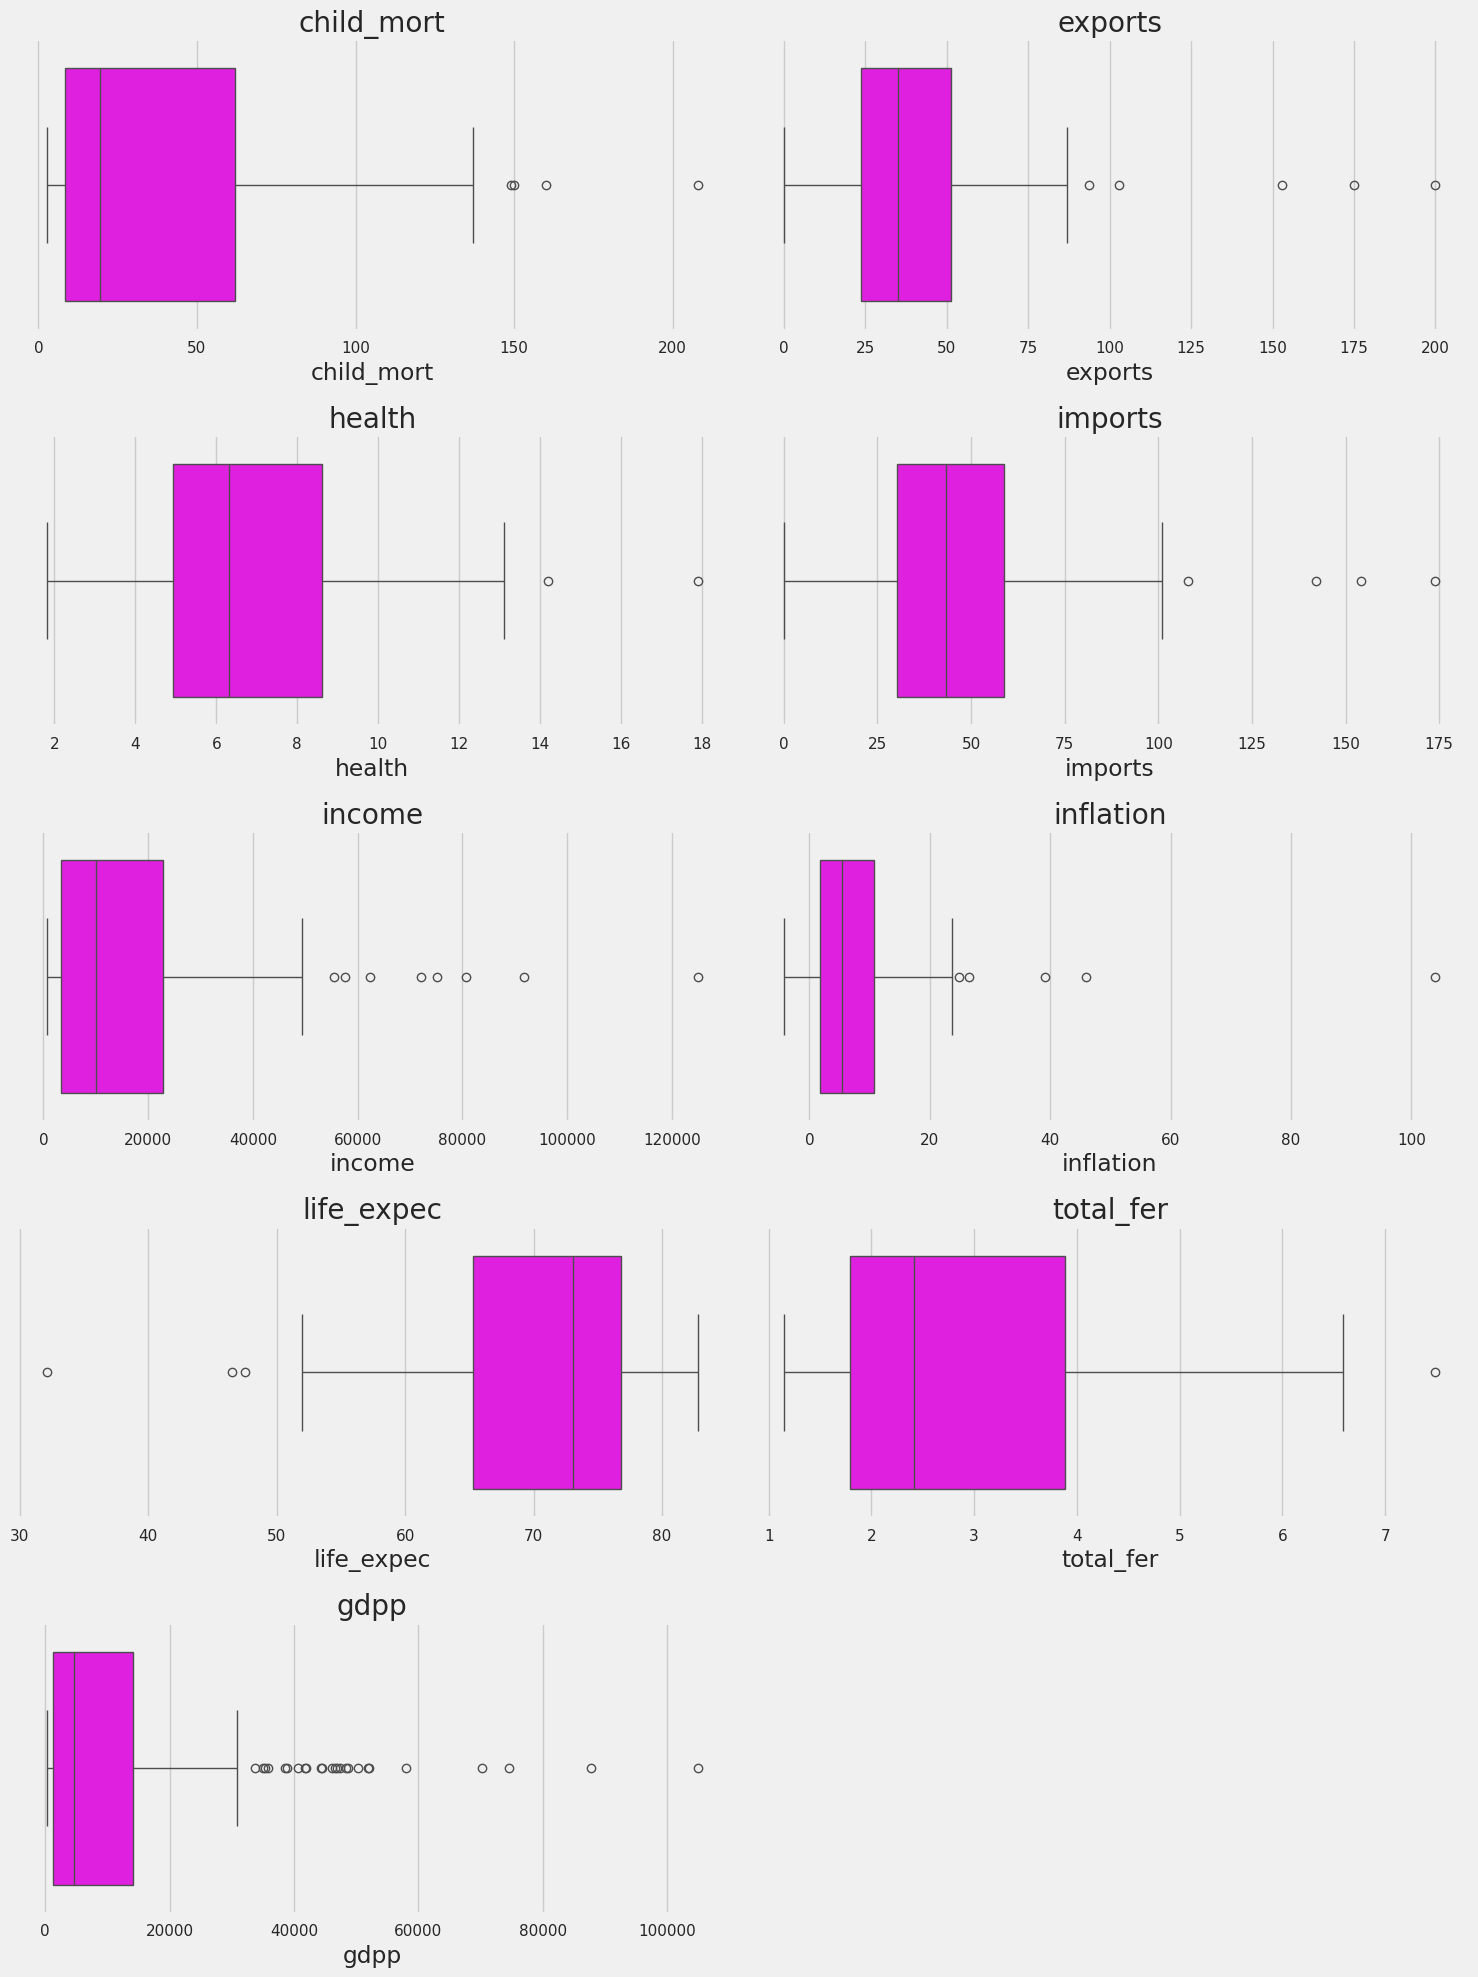

In [141]:
Country1 = pd.DataFrame(Country, columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'])
columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize=(15,20))
for i, col in enumerate (Country1.columns):
    ax= plt.subplot(5,2,i+1)
    sns.boxplot(x= columns[i], data=Country1, color='magenta' )
    plt.title(Country1.columns[i])
    plt.tight_layout()
plt.show()

Outliers

<ipython-input-142-08da403eaef1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Country1[col], hist=True , hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})
<ipython-input-142-08da403eaef1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Country1[col], hist=True , hist_kw

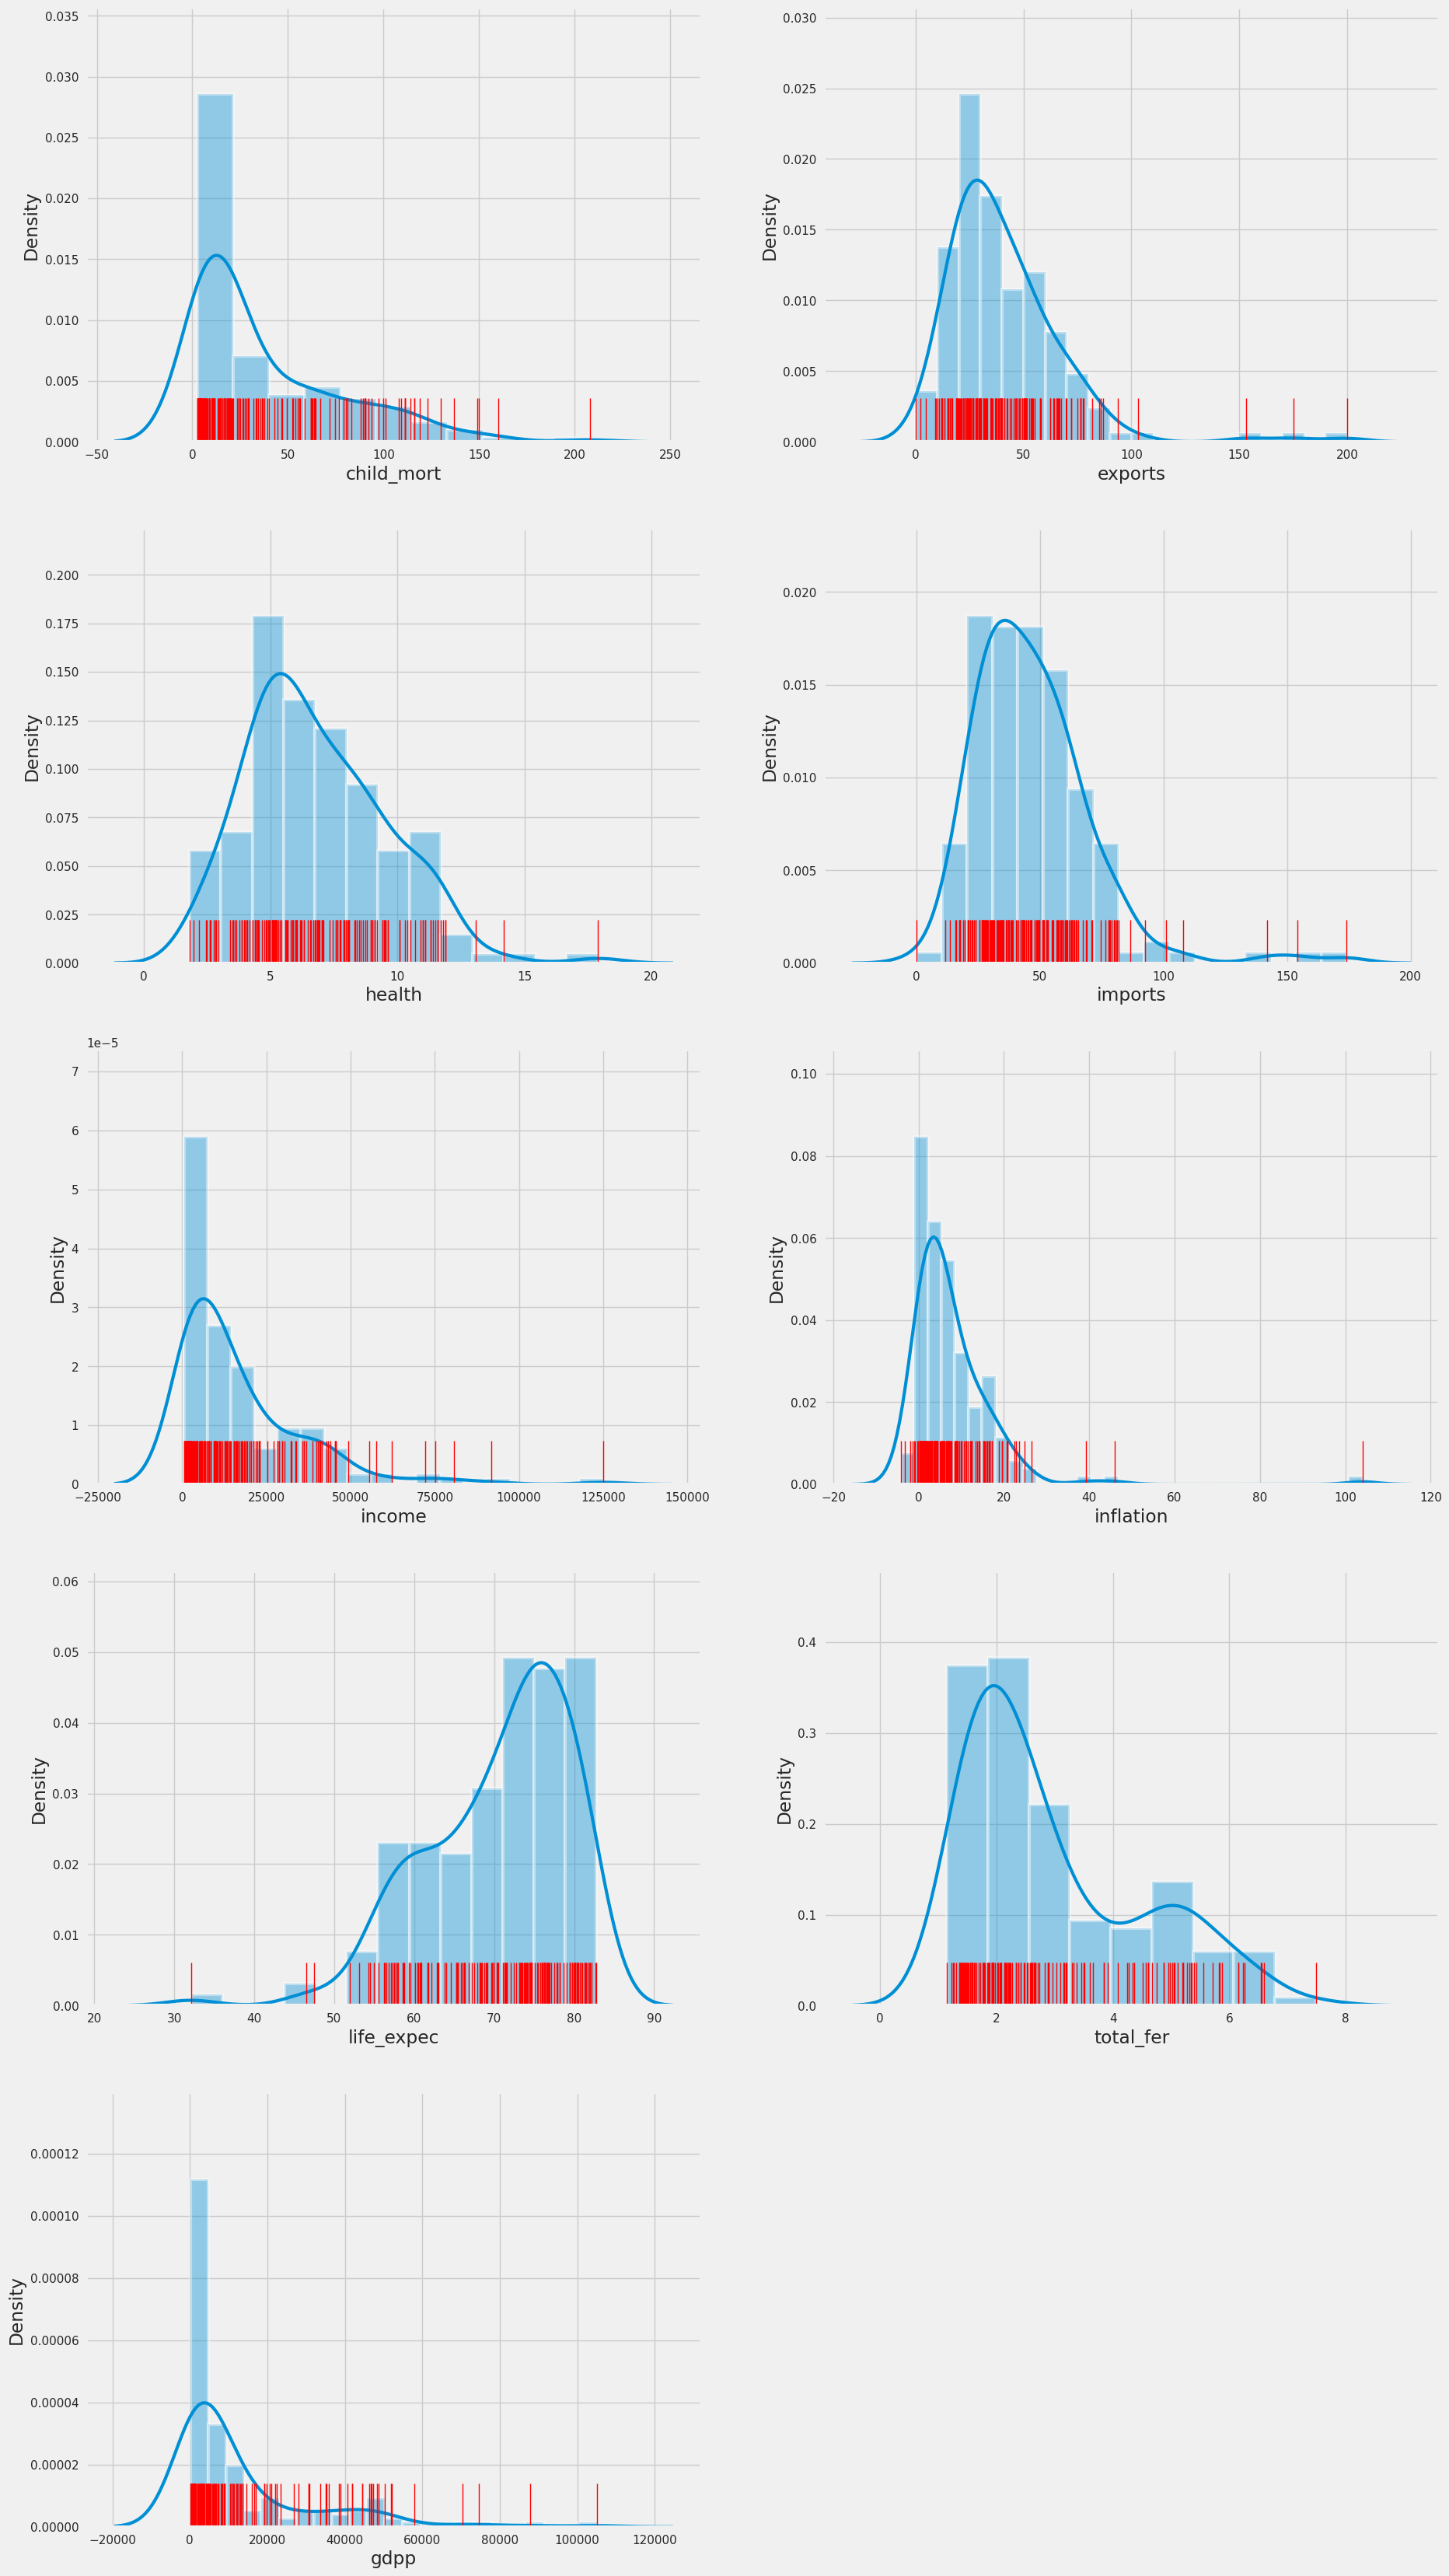

In [142]:
 i=1
plt.figure(figsize= (20,40))
for col in Country1.columns:
    plt.subplot(5,2,i)
    sns.distplot(Country1[col], hist=True , hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})
#This function combines the matplotlib hist function with the seaborn kdeplot()
    sns.rugplot(Country1[col], height=.1, clip_on=False, color='red')#This function is intended to complement other plots by showing the location of individual observations
    i=i+1
plt.show()

cek korelasi antar fitur

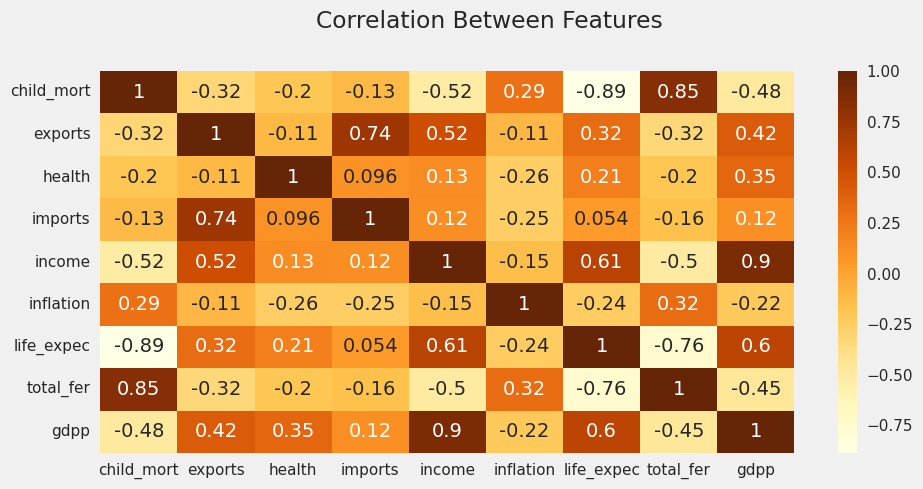

In [143]:
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(Country1.corr(), annot=True, cmap='YlOrBr')
plt.suptitle(f"Correlation Between Features")
plt.tight_layout()
plt.show()

##**Standarisasi**

In [144]:
X = Country[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
print("\nSelected features for clustering:")
print(X.head())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nStandardized features:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())


Selected features for clustering:
   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  

Standardized features:
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 

## **Review model tanpa PCA**

KMean

In [145]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
# Finding optimal clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

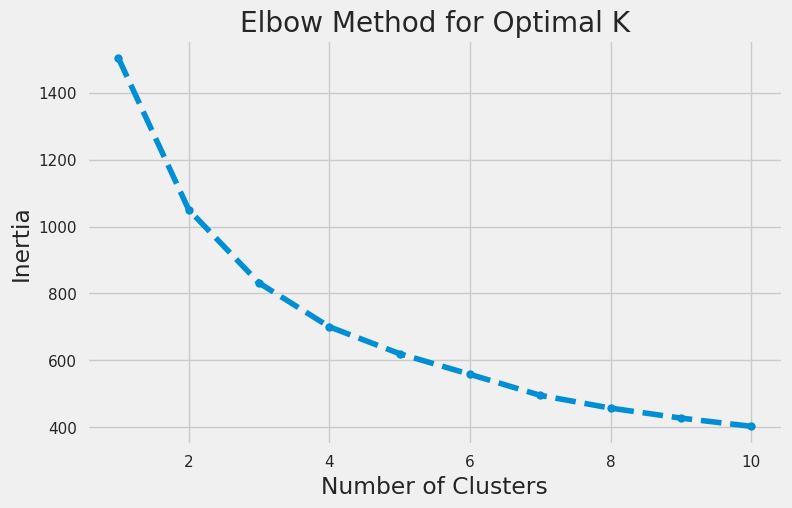

In [146]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

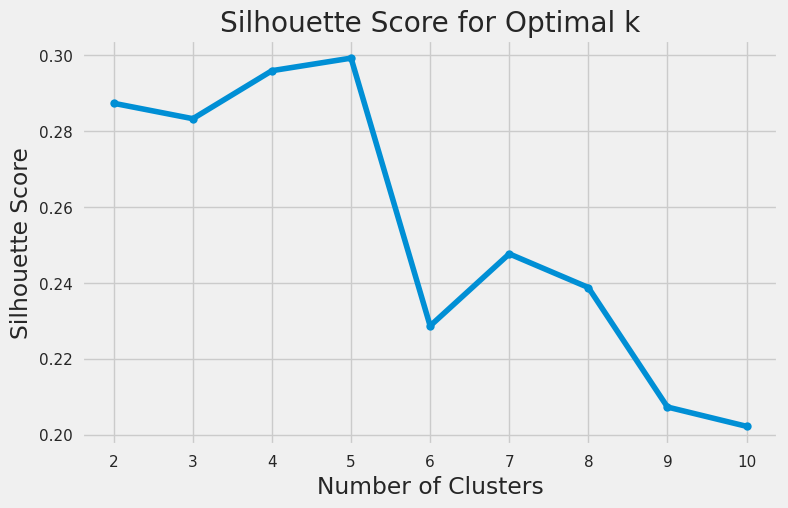

max silhouette score: 0.2992594995920442


In [147]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.show()
print('max silhouette score:',max(silhouette_scores))

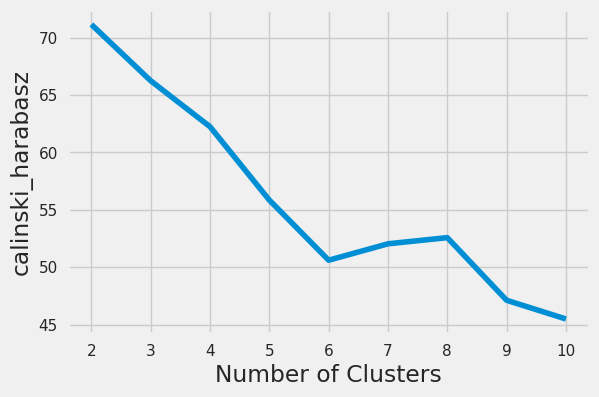

max calinski_harabaz score: 71.13746166773552


In [148]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(X_scaled)
    metrics.calinski_harabasz_score(X_scaled, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(X_scaled, kmeans.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [149]:
kmeans = KMeans(n_clusters=4, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(X_scaled)
Country_cluster_with_kmean_without_pca = pd.concat([Country, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
Country_cluster_with_kmean_without_pca

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


cluster
2    86
1    48
3    30
0     3
Name: count, dtype: int64


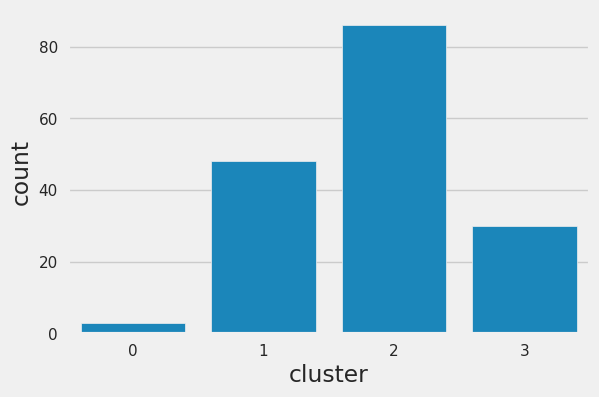

In [150]:
print(Country_cluster_with_kmean_without_pca['cluster'].value_counts())
sns.countplot(x=Country_cluster_with_kmean_without_pca.cluster)
sns.set(rc={"figure.figsize":(8, 6)})
plt.show()

silhouette_score or 3 clusters: 0.28329575683463126
cluster
1    84
0    47
2    36
Name: count, dtype: int64


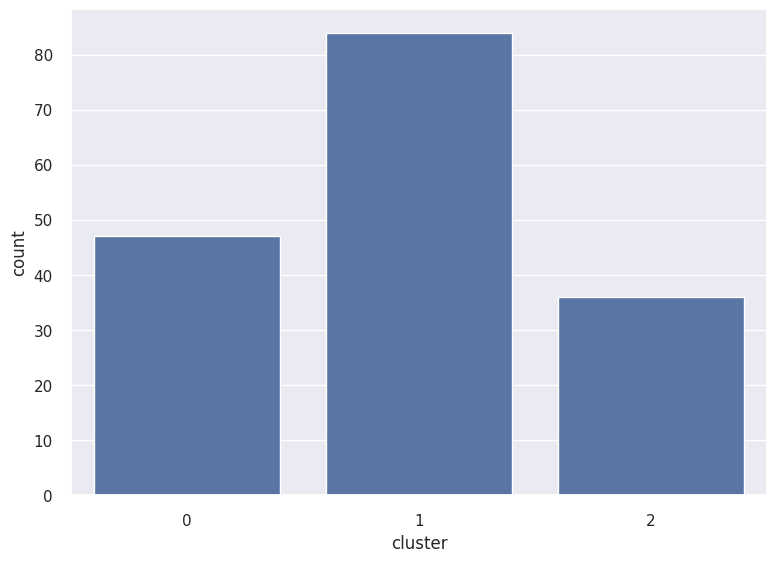

In [151]:
kmeans = KMeans(n_clusters=3, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(X_scaled)
print('silhouette_score or 3 clusters:',silhouette_score(X_scaled, kmeans.labels_))
Country_cluster_with_kmean_without_pca = pd.concat([Country, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
# counting number of clusters
print(Country_cluster_with_kmean_without_pca['cluster'].value_counts())
sns.countplot(x=Country_cluster_with_kmean_without_pca.cluster)
sns.set(rc={"figure.figsize":(6, 4)})

plt.show()

GaussianMixture

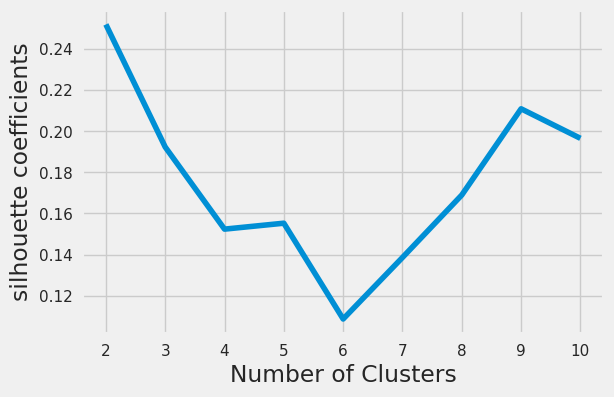

max silhouette score: 0.2519740690150683


In [152]:
from sklearn.mixture import GaussianMixture
sil_gmm = []
for k in range(2,11):#this range is optional
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component
    gmm.fit(X_scaled)
    score = silhouette_score(X_scaled, gmm.predict(X_scaled),metric='euclidean',random_state=5)
    sil_gmm.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sil_gmm)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()
print('max silhouette score:',max(sil_gmm))

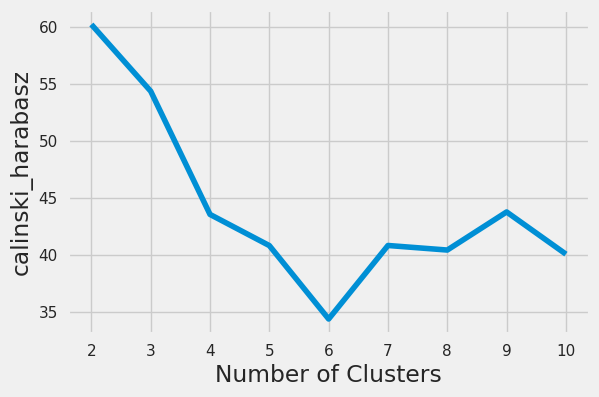

max calinski_harabaz score: 60.2196372985308


In [153]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component
    gmm.fit(X_scaled)
    metrics.calinski_harabasz_score(X_scaled, gmm.predict(X_scaled))
    calinski_harabaz.append(metrics.calinski_harabasz_score(X_scaled, gmm.predict(X_scaled)))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [154]:
gmm = GaussianMixture(n_components=2, random_state=1 )
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)
Country_cluster_with_gmm_without_pca = pd.concat([Country, pd.DataFrame({'cluster': labels})], axis = 1)
Country_cluster_with_gmm_without_pca

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


cluster
1    104
0     63
Name: count, dtype: int64


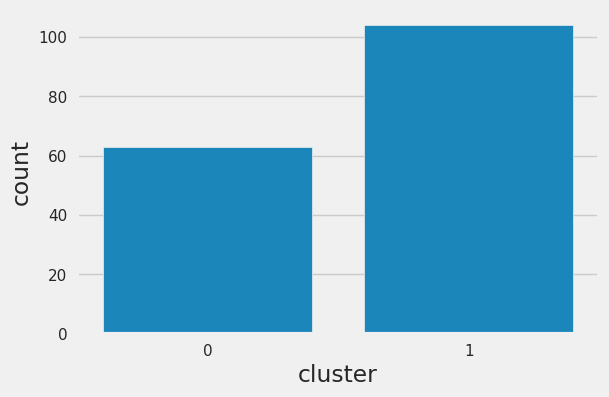

In [155]:
print(Country_cluster_with_gmm_without_pca['cluster'].value_counts())
sns.countplot(x=Country_cluster_with_gmm_without_pca.cluster)
plt.show()

AffinityPropagation

In [156]:
from sklearn.cluster import AffinityPropagation
Affinity = AffinityPropagation(random_state=5)
Affinity.fit(X_scaled)
labels = Affinity.labels_
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [157]:
score = silhouette_score(X_scaled, Affinity.labels_)
score

np.float64(0.17508012797721842)

In [158]:
from sklearn.cluster import AffinityPropagation
Affinity = AffinityPropagation(damping= .99)
Affinity.fit(X_scaled)
labels = Affinity.labels_
np.unique(labels)

array([0, 1, 2, 3])

In [159]:
score = metrics.calinski_harabasz_score(X_scaled, Affinity.labels_)
score

np.float64(52.95878517240729)

In [160]:
score = silhouette_score(X_scaled, Affinity.labels_)
score

np.float64(0.284435074161594)

In [161]:
Country_cluster_with_Affinity = pd.concat([Country, pd.DataFrame({'cluster': labels})], axis = 1)
Country_cluster_with_Affinity

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


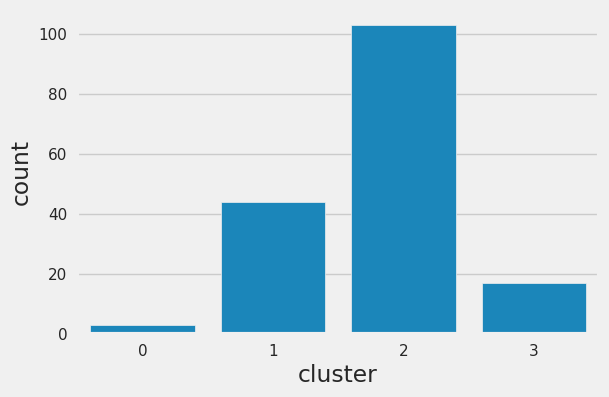

In [162]:
sns.countplot(x=Country_cluster_with_Affinity.cluster)
plt.show()

# **Perbandingan Model**

In [163]:
CM = pd.DataFrame({'models':['kmeans','gaussian mixture','Affinity Propagation']
                  ,'silhouette_coefficients':[0.2992594995920442,0.2519740690150683,0.284435074161594]
                  ,'calinski_harabasz_score':[71.13746166773552,60.2196372985308,52.95878517240729]
                  ,'n_clusters':[4,2,4]})
CM

,models,silhouette_coefficients,calinski_harabasz_score,n_clusters
0,kmeans,0.299259,71.137462,4
1,gaussian mixture,0.251974,60.219637,2
2,Affinity Propagation,0.284435,52.958785,4


Text(0, 0.5, 'scores')

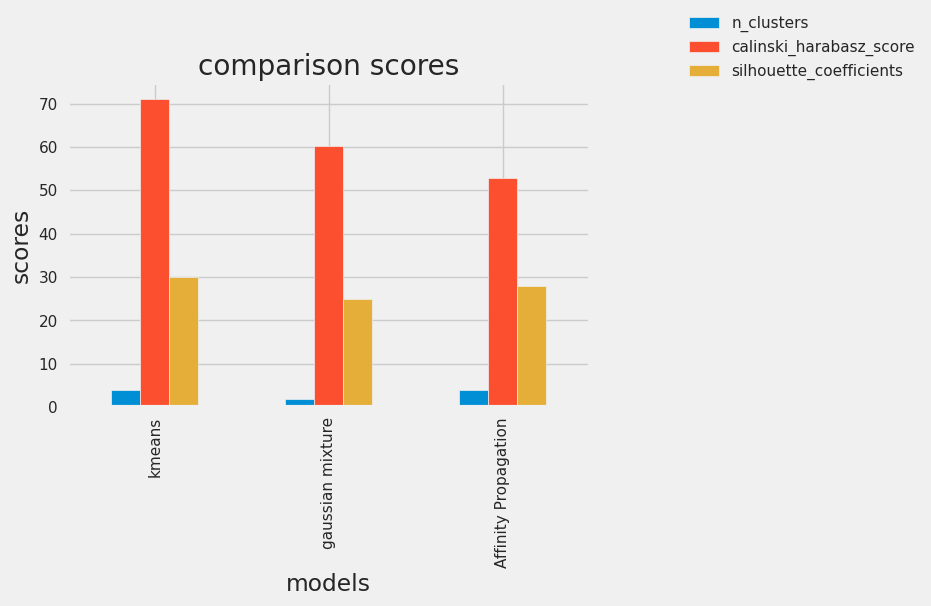

In [164]:
CM["silhouette_coefficients"] = round(CM["silhouette_coefficients"]*100)
CM.plot( x="models", y=['n_clusters',"calinski_harabasz_score","silhouette_coefficients"], kind="bar")
plt.legend(bbox_to_anchor =(1.65, 1.25))
plt.title("comparison scores")
plt.xlabel("models")
plt.ylabel("scores")

PCA Modeling

pca.components:
 [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [-0.20062815  0.05933283 -0.00727646  0.03003154 -0.16034699 -0.06628537
   0.60112652  0.75068875 -0.01677876]
 [ 0.07948854  0.70730269  0.24983051 -0.59218953 -0.09556237 -0.10463252
  -0.01848639 -0.02882643 -0.24299776]
 [ 0.68274306  0.01419742 -0.07249683  0.02894642 -0.35262369  0.01153775
   0.50466425 -0.29335267  0.24969636]
 [-0.3275418   0.12308207 -0.11308797 -0.09903717 -0.61298247  0.02523614
  -0.2

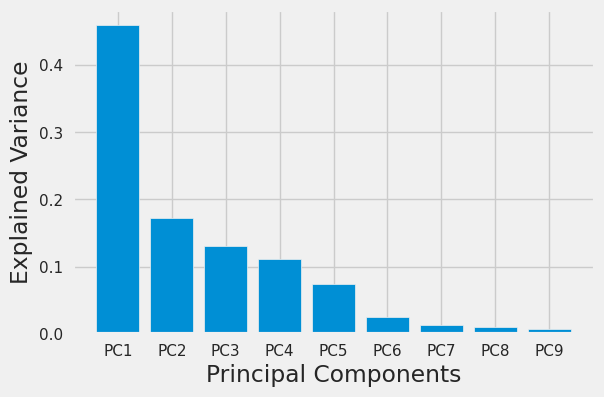

In [165]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)

print('pca.components:\n',pca.components_)
print('\npca.singular_values:\n',pca.singular_values_)
print('\npca.explained_variance_ratio_:\n',pca.explained_variance_ratio_)

PCs_explained_variance = np.array(pca.explained_variance_ratio_)
labels = ['PC' + str(x) for x in range (1, len(PCs_explained_variance)+1)]


plt.bar(x=range(1,len(PCs_explained_variance)+1), height = PCs_explained_variance, tick_label = labels)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.show()

Lebih dari setengah informasi berada pada PC1 dan PC2

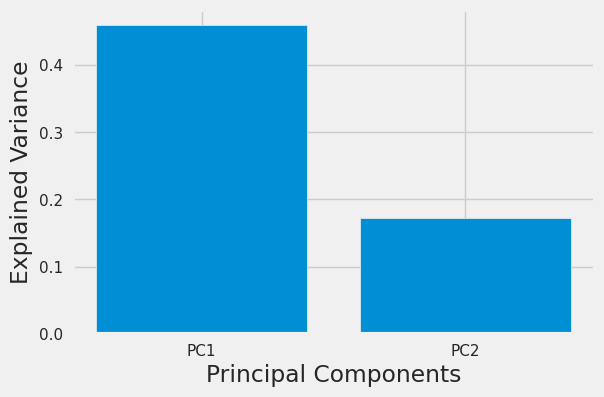

In [166]:
pca = PCA(n_components=0.60)
pca.fit_transform(X_scaled)

PCs_explained_variance = np.array(pca.explained_variance_ratio_)
labels = ['PC' + str(x) for x in range (1, len(PCs_explained_variance)+1)]


plt.bar(x=range(1,len(PCs_explained_variance)+1), height = PCs_explained_variance, tick_label = labels)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.show()

In [167]:
# selecting PC1 and PC2
pca = PCA(n_components = 2)
X_principal_2 = pca.fit_transform(X_scaled)
X_principal_2 = pd.DataFrame(X_principal_2)
X_principal_2.columns = ['P1', 'P2']

In [168]:
pca.singular_values_

array([26.28030915, 16.06984236])

In [169]:
#Percentage of variance explained by each of the selected components
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626])

In [170]:
X_principal_2

,P1,P2
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659
...,...,...
162,-0.820631,0.639570
163,-0.551036,-1.233886
164,0.498524,1.390744
165,-1.887451,-0.109453


Text(0, 0.5, 'PC2')

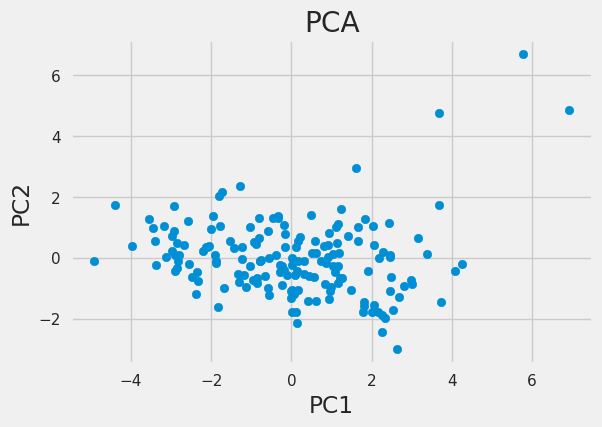

In [171]:
#visualizing data after pca
plt.scatter(X_principal_2['P1'], X_principal_2['P2'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

KMeans + PCA

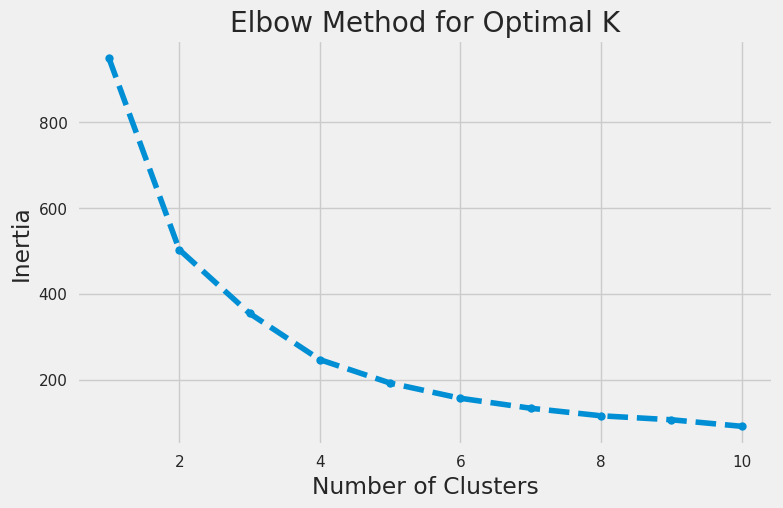

In [172]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_principal_2)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

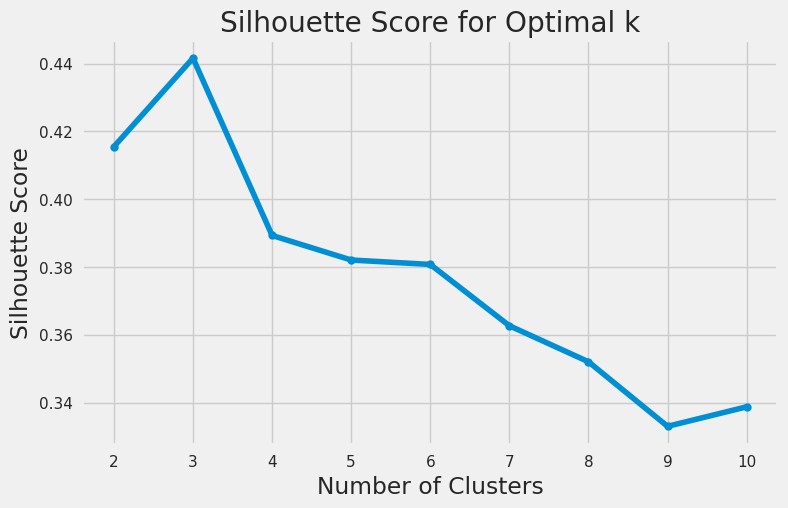

max silhouette score: 0.4416299354904196


In [173]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_principal_2)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_principal_2, kmeans.labels_))
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.show()
print('max silhouette score:',max(silhouette_scores))

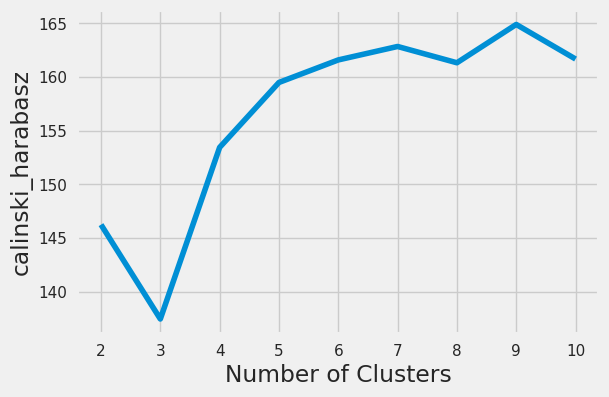

max calinski_harabaz score: 164.9071072047963


In [174]:
calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(X_principal_2)
    metrics.calinski_harabasz_score(X_principal_2, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(X_principal_2, kmeans.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

[[ 1.27445887 -0.38685281]
 [-1.85598458  0.26795887]
 [ 5.46022462  5.43247334]]


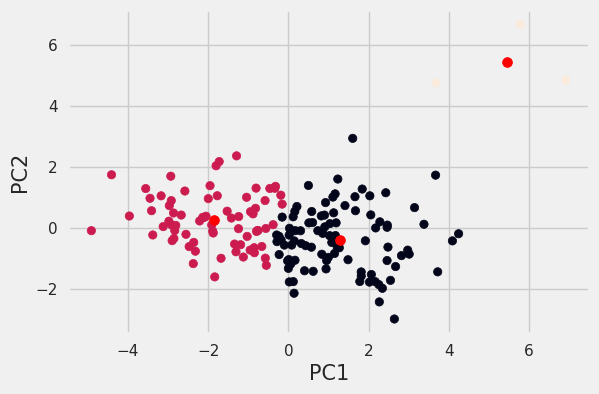

In [175]:
kmeans = KMeans(n_clusters=3, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(X_principal_2)
# Visualizing the clustering
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(X_principal_2['P1'], X_principal_2['P2'],c =kmeans.fit_predict(X_principal_2))
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PC1",fontsize=15)
plt.ylabel("PC2",fontsize=15)
plt.show()

In [176]:
pd.DataFrame(kmeans.labels_).value_counts()

,count
0,
0,92
1,72
2,3


In [177]:
x_reconstruct = pca.inverse_transform(X_principal_2)
x_reconstruct = pd.DataFrame(x_reconstruct)
x_reconstruct

,0,1,2,3,4,5,6,7,8
0,1.240514,-0.768368,-0.462638,-0.406162,-1.158514,0.561914,-1.261776,1.190916,-1.148185
1,-0.293802,-0.238585,0.207820,-0.325712,0.158040,-0.078104,0.314059,-0.264869,0.195871
2,0.031862,-0.360071,0.067624,-0.351854,-0.123903,0.058923,-0.020090,0.044495,-0.091044
3,1.557254,0.207147,-0.854487,0.665574,-1.130188,0.552214,-1.626353,1.447110,-1.229434
4,-0.407246,0.377223,0.122682,0.258714,0.414899,-0.200807,0.409702,-0.396071,0.399539
...,...,...,...,...,...,...,...,...,...
162,0.467634,0.159186,-0.279253,0.297159,-0.312560,0.153148,-0.491894,0.430595,-0.351651
163,-0.006827,-0.913011,0.216824,-0.917933,-0.247362,0.116815,0.040142,0.030929,-0.159575
164,0.059112,0.994283,-0.262875,1.014834,0.229974,-0.107990,-0.097437,0.014621,0.131738
165,0.770711,-0.602954,-0.258092,-0.378323,-0.754505,0.365524,-0.779375,0.745028,-0.736061


In [178]:
Country_cluster_with_kmean_with_pca = pd.concat([x_reconstruct, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
Country_cluster_with_kmean_with_pca

,0,1,2,3,4,5,6,7,8,cluster
0,1.240514,-0.768368,-0.462638,-0.406162,-1.158514,0.561914,-1.261776,1.190916,-1.148185,1
1,-0.293802,-0.238585,0.207820,-0.325712,0.158040,-0.078104,0.314059,-0.264869,0.195871,0
2,0.031862,-0.360071,0.067624,-0.351854,-0.123903,0.058923,-0.020090,0.044495,-0.091044,0
3,1.557254,0.207147,-0.854487,0.665574,-1.130188,0.552214,-1.626353,1.447110,-1.229434,1
4,-0.407246,0.377223,0.122682,0.258714,0.414899,-0.200807,0.409702,-0.396071,0.399539,0
...,...,...,...,...,...,...,...,...,...,...
162,0.467634,0.159186,-0.279253,0.297159,-0.312560,0.153148,-0.491894,0.430595,-0.351651,1
163,-0.006827,-0.913011,0.216824,-0.917933,-0.247362,0.116815,0.040142,0.030929,-0.159575,1
164,0.059112,0.994283,-0.262875,1.014834,0.229974,-0.107990,-0.097437,0.014621,0.131738,0
165,0.770711,-0.602954,-0.258092,-0.378323,-0.754505,0.365524,-0.779375,0.745028,-0.736061,1


Modeling + PCA (n_component = 0.90)

In [179]:
pca = PCA(n_components=0.9)
X_principal_90 = pca.fit_transform(X_scaled)
X_principal_90 = pd.DataFrame(X_principal_90)

#Percentage of variance explained by each of the selected components
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

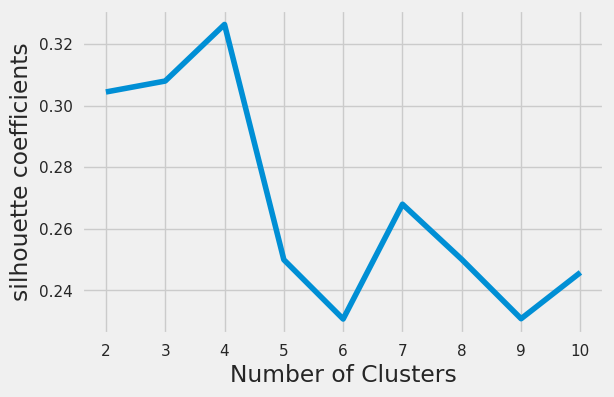

max silhouette score: 0.32636833851745356


In [180]:
## kmeans + pca(n_components=0.90)
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(X_principal_90)
    score = silhouette_score(X_principal_90, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()
print('max silhouette score:',max(silhouette_coefficients))

In [181]:
kmeans = KMeans(n_clusters=3, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(X_scaled)

cluster
1    84
0    47
2    36
Name: count, dtype: int64


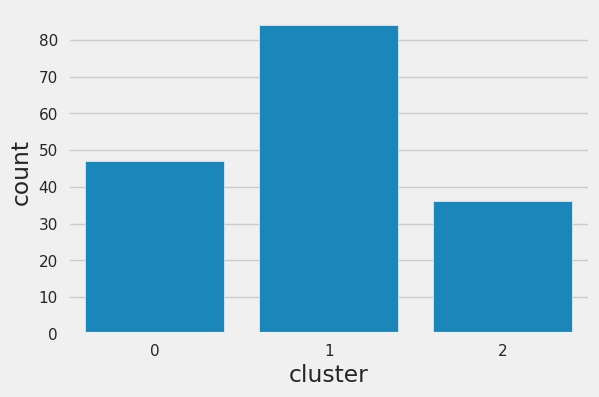

In [182]:
# counting number of clusters
Country_cluster_with_kmean_without_pca = pd.concat([Country, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
print(Country_cluster_with_kmean_without_pca['cluster'].value_counts())
sns.countplot(x=Country_cluster_with_kmean_without_pca.cluster)
plt.show()

In [183]:
Country['cluster'] = Country_cluster_with_kmean_without_pca['cluster']
Country

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


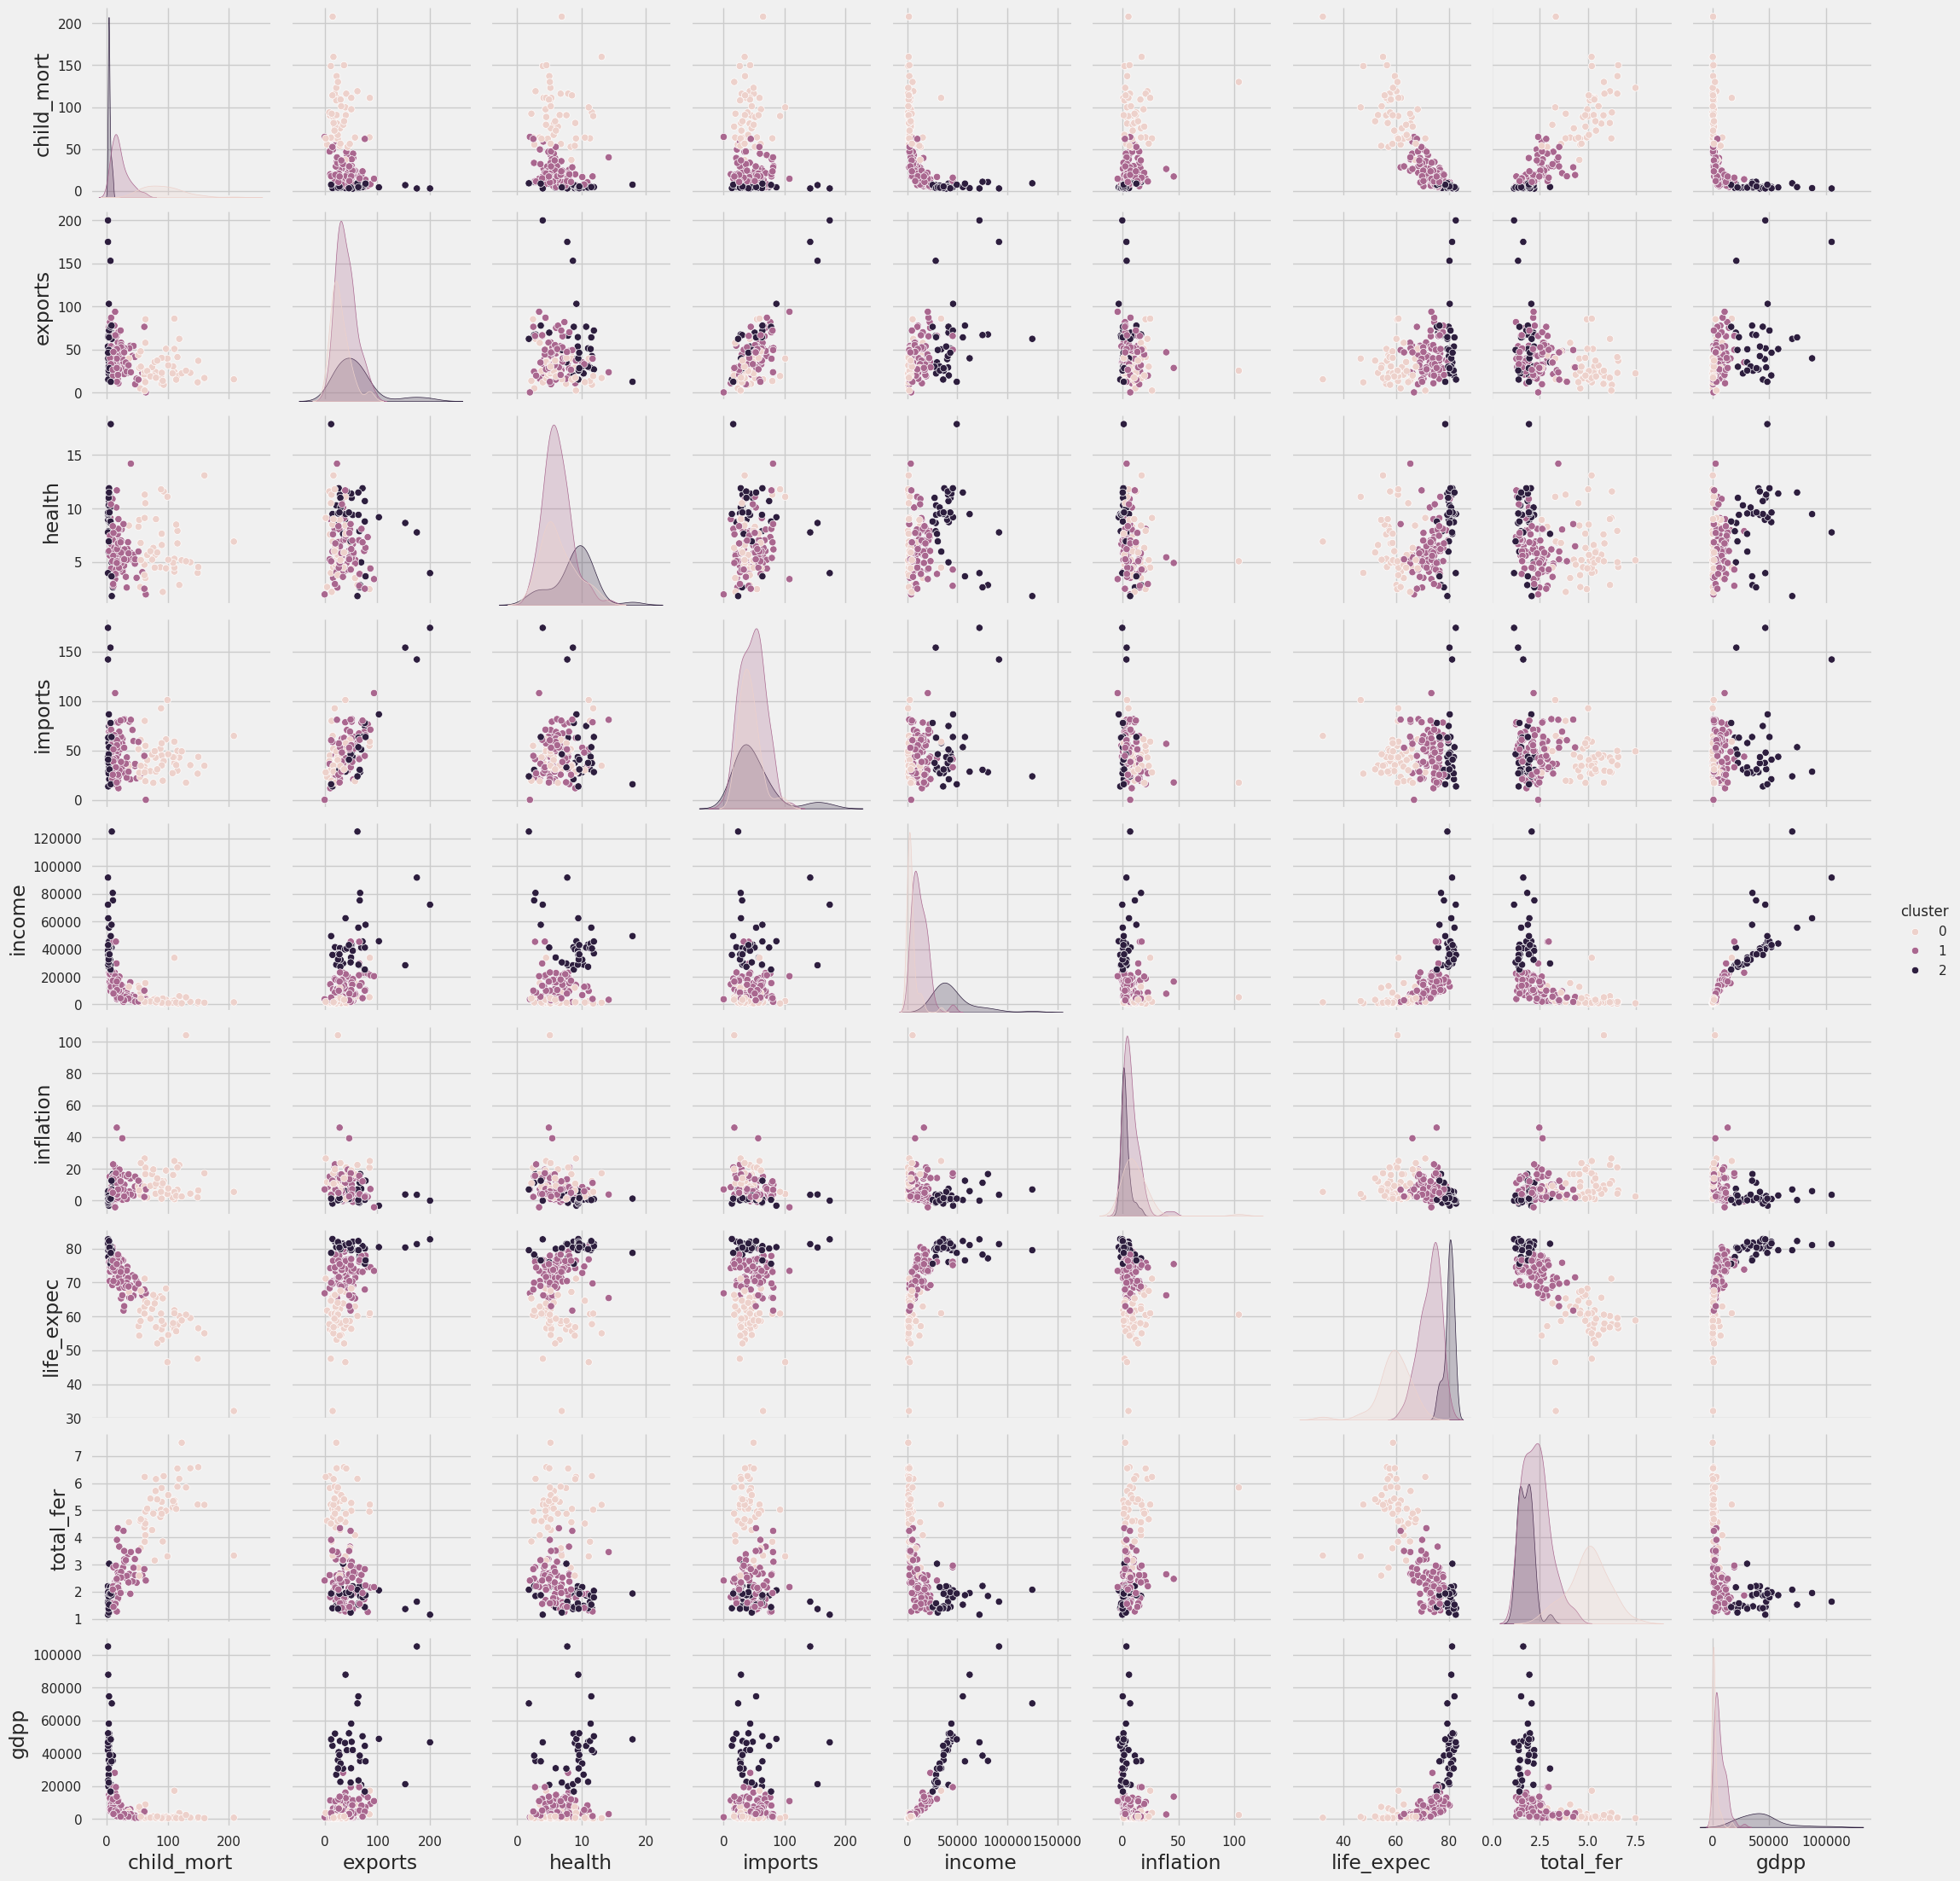

In [184]:
sns.pairplot(Country, hue="cluster")
plt.show()